# Reinforcement Learning with  TF Agents

Inspired by: "Hands-On Machine Learning with Scikit-Learn, Keras, and Tensorflow: Concepts, Tools, and Techniques to Build Intelligent Systems", 2nd Edition by Aurélien Géron, O'Reilly

https://github.com/ageron/handson-ml2

## Setup

In [1]:
import numpy as np
import os

import tensorflow as tf
from tensorflow import keras

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To get smooth animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [2]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

## Using TF Agents to beat Breakout

In [3]:
tf.random.set_seed(42)
np.random.seed(42)

In [4]:
from tf_agents.environments import suite_gym

In [5]:
env = suite_gym.load("Breakout-v4")
env

In [6]:
env.gym

<TimeLimit<OrderEnforcing<AtariEnv<Breakout-v4>>>>

In [7]:
env.seed(42)
env.reset()

TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8),
 'reward': array(0., dtype=float32),
 'step_type': array(0)})

In [8]:
env.step(1) # fire

TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8),
 'reward': array(0., dtype=float32),
 'step_type': array(1)})

Saving figure breakout_plot


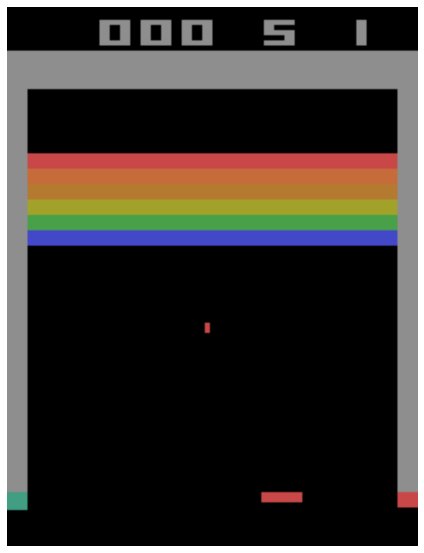

In [9]:
img = env.render(mode='rgb_array')

plt.figure(figsize=(6,8))
plt.imshow(img)
plt.axis('off')
save_fig('breakout_plot')
plt.show()

In [10]:
env.current_time_step()

TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8),
 'reward': array(0., dtype=float32),
 'step_type': array(1)})

### Environment specifications

In [11]:
env.observation_spec()

BoundedArraySpec(shape=(210, 160, 3), dtype=dtype('uint8'), name='observation', minimum=0, maximum=255)

In [12]:
env.action_spec()

BoundedArraySpec(shape=(), dtype=dtype('int64'), name='action', minimum=0, maximum=3)

In [13]:
env.time_step_spec()

TimeStep(
{'discount': BoundedArraySpec(shape=(), dtype=dtype('float32'), name='discount', minimum=0.0, maximum=1.0),
 'observation': BoundedArraySpec(shape=(210, 160, 3), dtype=dtype('uint8'), name='observation', minimum=0, maximum=255),
 'reward': ArraySpec(shape=(), dtype=dtype('float32'), name='reward'),
 'step_type': ArraySpec(shape=(), dtype=dtype('int32'), name='step_type')})

### Environment wrappers

In [14]:
from tf_agents.environments.wrappers import ActionRepeat

repeating_env = ActionRepeat(env, times=4)
repeating_env

In [15]:
repeating_env.unwrapped

In [16]:
# list of available wrappers
import tf_agents.environments.wrappers

for name in dir(tf_agents.environments.wrappers):
    obj = getattr(tf_agents.environments.wrappers, name)
    if hasattr(obj, '__base__') and issubclass(obj, tf_agents.environments.wrappers.PyEnvironmentBaseWrapper):
        print("{:27s} {}".format(name, obj.__doc__.split("\n")[0]))

ActionClipWrapper           Wraps an environment and clips actions to spec before applying.
ActionDiscretizeWrapper     Wraps an environment with continuous actions and discretizes them.
ActionOffsetWrapper         Offsets actions to be zero-based.
ActionRepeat                Repeates actions over n-steps while acummulating the received reward.
ExtraDisabledActionsWrapper Adds extra unavailable actions.
FixedLength                 Truncates long episodes and pads short episodes to have a fixed length.
FlattenActionWrapper        Flattens the action.
FlattenObservationsWrapper  Wraps an environment and flattens nested multi-dimensional observations.
GoalReplayEnvWrapper        Adds a goal to the observation, used for HER (Hindsight Experience Replay).
HistoryWrapper              Adds observation and action history to the environment's observations.
ObservationFilterWrapper    Filters observations based on an array of indexes.
OneHotActionWrapper         Converts discrete action to one_h

In [17]:
# The suite_gym.load() function can create an env and wrap it for you, both with TF-Agents environment wrappers and Gym environment wrappers (the latter are applied first).
from functools import partial
from gym.wrappers import TimeLimit

limited_repeating_env = suite_gym.load(
    'Breakout-v4',
    gym_env_wrappers=[partial(TimeLimit, max_episode_steps=10000)],
    env_wrappers=[partial(ActionRepeat, times=4)],
)

limited_repeating_env

In [18]:
from tf_agents.environments import suite_atari
from tf_agents.environments.atari_preprocessing import AtariPreprocessing
from tf_agents.environments.atari_wrappers import FrameStack4

max_episode_steps = 27000
environment_name = "BreakoutNoFrameskip-v4"

class AtariPreprocessingWithAutoFire(AtariPreprocessing):
    def reset(self, **kwargs):
        obs = super().reset(**kwargs)
        super().step(1) # FIRE to start
        return obs
    def step(self, action):
        lives_before_action = self.ale.lives()
        obs, rewards, done, info = super().step(action)
        if self.ale.lives() < lives_before_action and not done:
            super().step(1) # FIRE to start after life lost
        return obs, rewards, done, info

env = suite_atari.load(
    environment_name,
    max_episode_steps=max_episode_steps,
    gym_env_wrappers=[AtariPreprocessingWithAutoFire, FrameStack4])

In [19]:
env

In [20]:
env.seed(42)
env.reset()
for _ in range(4):
    time_step = env.step(3) # LEFT

In [21]:
def plot_observation(obs):
    # Since there are only 3 color channels, you cannot display 4 frames
    # with one primary color per frame. So this code computes the delta between
    # the current frame and the mean of the other frames, and it adds this delta
    # to the red and blue channels to get a pink color for the current frame.
    obs = obs.astype(np.float32)
    img = obs[..., :3]
    current_frame_delta = np.maximum(obs[..., 3] - obs[..., :3].mean(axis=-1), 0.)
    img[..., 0] += current_frame_delta
    img[..., 2] += current_frame_delta
    img = np.clip(img / 150, 0, 1)
    plt.imshow(img)
    plt.axis("off")

Saving figure preprocessed_breakout_plot


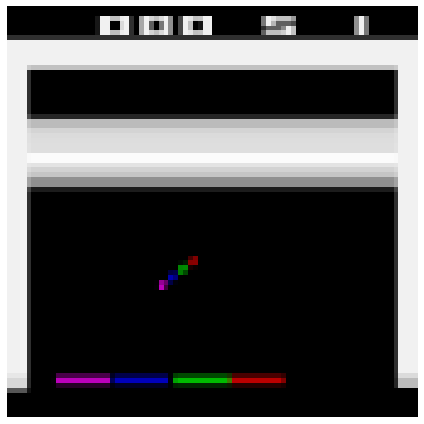

In [22]:
plt.figure(figsize=(6, 6))
plot_observation(time_step.observation)
save_fig("preprocessed_breakout_plot")
plt.show()

In [23]:
# Convert the Python environment to a TF environment:
from tf_agents.environments.tf_py_environment import TFPyEnvironment
tf_env = TFPyEnvironment(env)

### Creating the DQN

Create a small class to normalize the observations. Images are stored using bytes from 0 to 255 to use less RAM, but we want to pass floats from 0.0 to 1.0 to the neural network:

In [24]:
# Create the Q Network
from tf_agents.networks.q_network import QNetwork

preprocessing_layer = keras.layers.Lambda(
    lambda obs: tf.cast(obs, np.float32) / 255.)

conv_layer_params=[(32, (8, 8), 4), (64, (4, 4), 2), (64, (3, 3), 1)]
fc_layer_params=[512]

q_net = QNetwork(
    tf_env.observation_spec(),
    tf_env.action_spec(),
    preprocessing_layers=preprocessing_layer,
    conv_layer_params=conv_layer_params,
    fc_layer_params=fc_layer_params)




In [25]:
# Create DQN agent
from tf_agents.agents.dqn.dqn_agent import DqnAgent

train_step = tf.Variable(0)
update_period = 4 # run a training step every 4 collect steps
optimizer = keras.optimizers.RMSprop(learning_rate=2.5e-4, rho=0.95, momentum=0.0,
                                     epsilon=0.00001, centered=True)
epsilon_fn = keras.optimizers.schedules.PolynomialDecay( initial_learning_rate=1.0, # initial ε
    decay_steps=250000 // update_period, # <=> 1,000,000 ALE frames
    end_learning_rate=0.01) # final ε)

agent = DqnAgent(tf_env.time_step_spec(),
                tf_env.action_spec(),
                q_network=q_net,
                optimizer=optimizer,
                target_update_period=2000, # <=> 32,000 ALE frames
                td_errors_loss_fn=keras.losses.Huber(reduction="none"),
                gamma=0.99, # discount factor
                train_step_counter=train_step,
                epsilon_greedy=lambda: epsilon_fn(train_step))

agent.initialize()

In [26]:
# Create replay buffer
from tf_agents.replay_buffers import tf_uniform_replay_buffer

replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec=agent.collect_data_spec,
    batch_size=tf_env.batch_size,
    max_length=100000
)

# Create observer
replay_buffer_observer = replay_buffer.add_batch

In [27]:
# Create a simple custom observer that counts and displays the number of times it is called 
# (except when it is passed a trajectory that represents the boundary between two episodes, as this does not count as a step)

class ShowProgress:
    def __init__(self, total):
        self.counter = 0
        self.total = total
    def __call__(self, trajectory):
        if not trajectory.is_boundary():
            self.counter += 1
        if self.counter % 100 == 0:
            print("\r{}/{}".format(self.counter, self.total), end="")

In [28]:
# Add training metrics
from tf_agents.metrics import tf_metrics

train_metrics = [
    tf_metrics.NumberOfEpisodes(),
    tf_metrics.EnvironmentSteps(),
    tf_metrics.AverageReturnMetric(),
    tf_metrics.AverageEpisodeLengthMetric()
]

In [29]:
train_metrics[0].result()

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [30]:
from tf_agents.eval.metric_utils import log_metrics
import logging

logging.getLogger().setLevel(logging.INFO)
log_metrics(train_metrics)

INFO:absl: 
		 NumberOfEpisodes = 0
		 EnvironmentSteps = 0
		 AverageReturn = 0.0
		 AverageEpisodeLength = 0.0


In [31]:
# Create the collect driver
from tf_agents.drivers.dynamic_step_driver import DynamicStepDriver

collect_driver = DynamicStepDriver(
    tf_env,
    agent.collect_policy,
    observers=[replay_buffer_observer]+train_metrics,
    num_steps=update_period
) # collect 4 steps for each training iteration

In [32]:
# collect the initial experiences before training
from tf_agents.policies.random_tf_policy import RandomTFPolicy

initial_collect_policy = RandomTFPolicy(tf_env.time_step_spec(), tf_env.action_spec())

init_driver = DynamicStepDriver(
    tf_env,
    initial_collect_policy,
    observers=[replay_buffer.add_batch, ShowProgress(20000)],
    num_steps=20000) # <=> 80,000 ALE frames
    
final_time_step, final_policy_state = init_driver.run()

20000/20000

In [33]:
# Let's sample 2 sub-episodes, with 3 time steps each and display them
tf.random.set_seed(9) # chosen to show an example of trajectory at the end of an episode

trajectories, buffer_info = next(iter(replay_buffer.as_dataset(
    sample_batch_size=2,
    num_steps=3,
    single_deterministic_pass=False)))

Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


In [34]:
trajectories._fields

('step_type',
 'observation',
 'action',
 'policy_info',
 'next_step_type',
 'reward',
 'discount')

In [35]:
trajectories.observation.shape

TensorShape([2, 3, 84, 84, 4])

In [36]:
from tf_agents.trajectories.trajectory import to_transition

time_steps, action_steps, next_time_steps = to_transition(trajectories)
time_steps.observation.shape

TensorShape([2, 2, 84, 84, 4])

In [37]:
trajectories.step_type.numpy()

array([[1, 1, 1],
       [1, 1, 1]])

Saving figure sub_episodes_plot


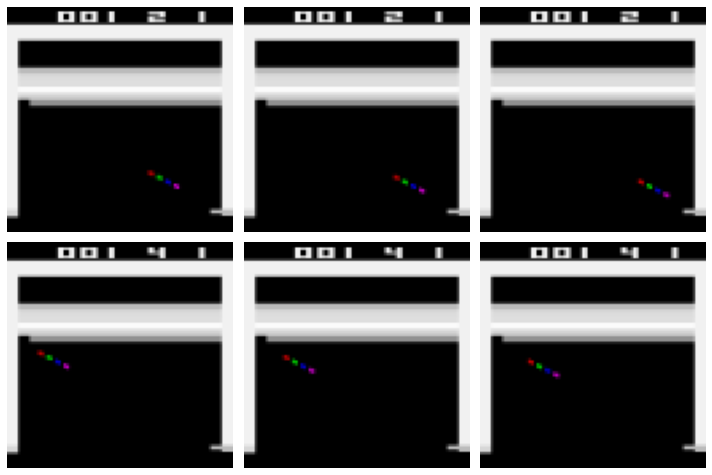

In [38]:
plt.figure(figsize=(10, 6.8))
for row in range(2):
    for col in range(3):
        plt.subplot(2, 3, row * 3 + col + 1)
        plot_observation(trajectories.observation[row, col].numpy())
plt.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0, wspace=0.02)
save_fig("sub_episodes_plot")
plt.show()

In [39]:
# Create the dataset
dataset = replay_buffer.as_dataset(
    sample_batch_size=64,
    num_steps=2,
    num_parallel_calls=3).prefetch(3)

In [40]:
# Convert the main functions to TF Functions for better performance
from tf_agents.utils.common import function

collect_driver.run = function(collect_driver.run)
agent.train = function(agent.train)

In [41]:
# Run the main loop!!!
def train_agent(n_iterations):
    time_step = None
    policy_state = agent.collect_policy.get_initial_state(tf_env.batch_size)
    iterator = iter(dataset)
    for iteration in range(n_iterations):
        time_step, policy_state = collect_driver.run(time_step, policy_state)
        trajectories, buffer_info = next(iterator)
        train_loss = agent.train(trajectories)
        
        if iteration % 1000 == 0:
            log_metrics(train_metrics)
            print("\r{} loss:{:.5f}".format(
            iteration, train_loss.loss.numpy()), end="")

In [42]:
# Run the next cell to train the agent for 50,000 steps. Then look at its behavior by running the following cell. 
# You can run these two cells as many times as you wish. The agent will keep improving! It will likely take over 200,000 iterations for the agent to become reasonably good.

train_agent(n_iterations=500000)

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))


Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))
INFO:absl: 
		 NumberOfEpisodes = 0
		 EnvironmentSteps = 4
		 AverageReturn = 0.0
		 AverageEpisodeLength = 0.0


0 loss:0.01556

INFO:absl: 
		 NumberOfEpisodes = 27
		 EnvironmentSteps = 4004
		 AverageReturn = 0.8999999761581421
		 AverageEpisodeLength = 151.8000030517578


1000 loss:0.00012

INFO:absl: 
		 NumberOfEpisodes = 51
		 EnvironmentSteps = 8004
		 AverageReturn = 1.0
		 AverageEpisodeLength = 176.3000030517578


2000 loss:0.00104

INFO:absl: 
		 NumberOfEpisodes = 77
		 EnvironmentSteps = 12004
		 AverageReturn = 0.699999988079071
		 AverageEpisodeLength = 159.3000030517578


3000 loss:0.00031

INFO:absl: 
		 NumberOfEpisodes = 98
		 EnvironmentSteps = 16004
		 AverageReturn = 0.6000000238418579
		 AverageEpisodeLength = 191.1999969482422


4000 loss:0.00836

INFO:absl: 
		 NumberOfEpisodes = 125
		 EnvironmentSteps = 20004
		 AverageReturn = 0.4000000059604645
		 AverageEpisodeLength = 134.1999969482422


5000 loss:0.00032

INFO:absl: 
		 NumberOfEpisodes = 146
		 EnvironmentSteps = 24004
		 AverageReturn = 1.5
		 AverageEpisodeLength = 228.1999969482422


6000 loss:0.00765

INFO:absl: 
		 NumberOfEpisodes = 169
		 EnvironmentSteps = 28004
		 AverageReturn = 0.6000000238418579
		 AverageEpisodeLength = 160.39999389648438


7000 loss:0.00008

INFO:absl: 
		 NumberOfEpisodes = 191
		 EnvironmentSteps = 32004
		 AverageReturn = 1.2999999523162842
		 AverageEpisodeLength = 190.60000610351562


8000 loss:0.00801

INFO:absl: 
		 NumberOfEpisodes = 216
		 EnvironmentSteps = 36004
		 AverageReturn = 0.800000011920929
		 AverageEpisodeLength = 151.39999389648438


9000 loss:0.00033

INFO:absl: 
		 NumberOfEpisodes = 239
		 EnvironmentSteps = 40004
		 AverageReturn = 0.699999988079071
		 AverageEpisodeLength = 167.1999969482422


10000 loss:0.00007

INFO:absl: 
		 NumberOfEpisodes = 261
		 EnvironmentSteps = 44004
		 AverageReturn = 1.2000000476837158
		 AverageEpisodeLength = 184.1999969482422


11000 loss:0.00695

INFO:absl: 
		 NumberOfEpisodes = 281
		 EnvironmentSteps = 48004
		 AverageReturn = 1.899999976158142
		 AverageEpisodeLength = 210.39999389648438


12000 loss:0.00111

INFO:absl: 
		 NumberOfEpisodes = 302
		 EnvironmentSteps = 52004
		 AverageReturn = 0.8999999761581421
		 AverageEpisodeLength = 152.3000030517578


13000 loss:0.00009

INFO:absl: 
		 NumberOfEpisodes = 320
		 EnvironmentSteps = 56004
		 AverageReturn = 1.2000000476837158
		 AverageEpisodeLength = 239.1999969482422


14000 loss:0.00140

INFO:absl: 
		 NumberOfEpisodes = 342
		 EnvironmentSteps = 60004
		 AverageReturn = 1.399999976158142
		 AverageEpisodeLength = 187.8000030517578


15000 loss:0.00012

INFO:absl: 
		 NumberOfEpisodes = 365
		 EnvironmentSteps = 64004
		 AverageReturn = 1.100000023841858
		 AverageEpisodeLength = 154.89999389648438


16000 loss:0.00776

INFO:absl: 
		 NumberOfEpisodes = 385
		 EnvironmentSteps = 68004
		 AverageReturn = 1.600000023841858
		 AverageEpisodeLength = 219.3000030517578


17000 loss:0.00002

INFO:absl: 
		 NumberOfEpisodes = 406
		 EnvironmentSteps = 72004
		 AverageReturn = 1.399999976158142
		 AverageEpisodeLength = 181.1999969482422


18000 loss:0.00136

INFO:absl: 
		 NumberOfEpisodes = 426
		 EnvironmentSteps = 76004
		 AverageReturn = 1.2000000476837158
		 AverageEpisodeLength = 199.3000030517578


19000 loss:0.00005

INFO:absl: 
		 NumberOfEpisodes = 450
		 EnvironmentSteps = 80004
		 AverageReturn = 0.8999999761581421
		 AverageEpisodeLength = 151.3000030517578


20000 loss:0.00308

INFO:absl: 
		 NumberOfEpisodes = 473
		 EnvironmentSteps = 84004
		 AverageReturn = 0.699999988079071
		 AverageEpisodeLength = 144.89999389648438


21000 loss:0.00048

INFO:absl: 
		 NumberOfEpisodes = 495
		 EnvironmentSteps = 88004
		 AverageReturn = 1.600000023841858
		 AverageEpisodeLength = 179.0


22000 loss:0.00067

INFO:absl: 
		 NumberOfEpisodes = 516
		 EnvironmentSteps = 92004
		 AverageReturn = 1.2999999523162842
		 AverageEpisodeLength = 163.5


23000 loss:0.00033

INFO:absl: 
		 NumberOfEpisodes = 537
		 EnvironmentSteps = 96004
		 AverageReturn = 1.5
		 AverageEpisodeLength = 173.0


24000 loss:0.00029

INFO:absl: 
		 NumberOfEpisodes = 558
		 EnvironmentSteps = 100004
		 AverageReturn = 1.0
		 AverageEpisodeLength = 156.8000030517578


25000 loss:0.00022

INFO:absl: 
		 NumberOfEpisodes = 579
		 EnvironmentSteps = 104004
		 AverageReturn = 1.100000023841858
		 AverageEpisodeLength = 162.3000030517578


26000 loss:0.00919

INFO:absl: 
		 NumberOfEpisodes = 601
		 EnvironmentSteps = 108004
		 AverageReturn = 1.0
		 AverageEpisodeLength = 154.6999969482422


27000 loss:0.00055

INFO:absl: 
		 NumberOfEpisodes = 622
		 EnvironmentSteps = 112004
		 AverageReturn = 1.399999976158142
		 AverageEpisodeLength = 171.60000610351562


28000 loss:0.00879

INFO:absl: 
		 NumberOfEpisodes = 644
		 EnvironmentSteps = 116004
		 AverageReturn = 1.600000023841858
		 AverageEpisodeLength = 200.8000030517578


29000 loss:0.00014

INFO:absl: 
		 NumberOfEpisodes = 665
		 EnvironmentSteps = 120004
		 AverageReturn = 2.200000047683716
		 AverageEpisodeLength = 203.39999389648438


30000 loss:0.00169

INFO:absl: 
		 NumberOfEpisodes = 686
		 EnvironmentSteps = 124004
		 AverageReturn = 1.399999976158142
		 AverageEpisodeLength = 173.0


31000 loss:0.00091

INFO:absl: 
		 NumberOfEpisodes = 710
		 EnvironmentSteps = 128004
		 AverageReturn = 1.0
		 AverageEpisodeLength = 172.10000610351562


32000 loss:0.00059

INFO:absl: 
		 NumberOfEpisodes = 729
		 EnvironmentSteps = 132004
		 AverageReturn = 2.0
		 AverageEpisodeLength = 221.10000610351562


33000 loss:0.00029

INFO:absl: 
		 NumberOfEpisodes = 746
		 EnvironmentSteps = 136004
		 AverageReturn = 3.200000047683716
		 AverageEpisodeLength = 242.39999389648438


34000 loss:0.01150

INFO:absl: 
		 NumberOfEpisodes = 764
		 EnvironmentSteps = 140004
		 AverageReturn = 2.9000000953674316
		 AverageEpisodeLength = 245.60000610351562


35000 loss:0.00074

INFO:absl: 
		 NumberOfEpisodes = 777
		 EnvironmentSteps = 144004
		 AverageReturn = 3.0999999046325684
		 AverageEpisodeLength = 293.6000061035156


36000 loss:0.00150

INFO:absl: 
		 NumberOfEpisodes = 791
		 EnvironmentSteps = 148004
		 AverageReturn = 3.799999952316284
		 AverageEpisodeLength = 312.0


37000 loss:0.00064

INFO:absl: 
		 NumberOfEpisodes = 807
		 EnvironmentSteps = 152004
		 AverageReturn = 3.0
		 AverageEpisodeLength = 224.0


38000 loss:0.00108

INFO:absl: 
		 NumberOfEpisodes = 821
		 EnvironmentSteps = 156004
		 AverageReturn = 3.5999999046325684
		 AverageEpisodeLength = 303.0


39000 loss:0.00043

INFO:absl: 
		 NumberOfEpisodes = 837
		 EnvironmentSteps = 160004
		 AverageReturn = 3.799999952316284
		 AverageEpisodeLength = 252.39999389648438


40000 loss:0.00628

INFO:absl: 
		 NumberOfEpisodes = 850
		 EnvironmentSteps = 164004
		 AverageReturn = 6.599999904632568
		 AverageEpisodeLength = 311.8999938964844


41000 loss:0.00090

INFO:absl: 
		 NumberOfEpisodes = 865
		 EnvironmentSteps = 168004
		 AverageReturn = 3.0999999046325684
		 AverageEpisodeLength = 261.5


42000 loss:0.00775

INFO:absl: 
		 NumberOfEpisodes = 880
		 EnvironmentSteps = 172004
		 AverageReturn = 5.400000095367432
		 AverageEpisodeLength = 230.6999969482422


43000 loss:0.00241

INFO:absl: 
		 NumberOfEpisodes = 897
		 EnvironmentSteps = 176004
		 AverageReturn = 3.9000000953674316
		 AverageEpisodeLength = 266.20001220703125


44000 loss:0.01856

INFO:absl: 
		 NumberOfEpisodes = 910
		 EnvironmentSteps = 180004
		 AverageReturn = 5.5
		 AverageEpisodeLength = 326.1000061035156


45000 loss:0.00058

INFO:absl: 
		 NumberOfEpisodes = 925
		 EnvironmentSteps = 184004
		 AverageReturn = 4.400000095367432
		 AverageEpisodeLength = 274.8999938964844


46000 loss:0.01262

INFO:absl: 
		 NumberOfEpisodes = 937
		 EnvironmentSteps = 188004
		 AverageReturn = 6.599999904632568
		 AverageEpisodeLength = 349.3999938964844


47000 loss:0.00264

INFO:absl: 
		 NumberOfEpisodes = 951
		 EnvironmentSteps = 192004
		 AverageReturn = 5.800000190734863
		 AverageEpisodeLength = 270.3999938964844


48000 loss:0.00257

INFO:absl: 
		 NumberOfEpisodes = 963
		 EnvironmentSteps = 196004
		 AverageReturn = 6.199999809265137
		 AverageEpisodeLength = 278.20001220703125


49000 loss:0.00344

INFO:absl: 
		 NumberOfEpisodes = 972
		 EnvironmentSteps = 200004
		 AverageReturn = 9.600000381469727
		 AverageEpisodeLength = 435.3999938964844


50000 loss:0.01330

INFO:absl: 
		 NumberOfEpisodes = 982
		 EnvironmentSteps = 204004
		 AverageReturn = 11.100000381469727
		 AverageEpisodeLength = 404.3999938964844


51000 loss:0.00282

INFO:absl: 
		 NumberOfEpisodes = 991
		 EnvironmentSteps = 208004
		 AverageReturn = 9.100000381469727
		 AverageEpisodeLength = 463.6000061035156


52000 loss:0.00781

INFO:absl: 
		 NumberOfEpisodes = 1001
		 EnvironmentSteps = 212004
		 AverageReturn = 11.0
		 AverageEpisodeLength = 440.6000061035156


53000 loss:0.00100

INFO:absl: 
		 NumberOfEpisodes = 1009
		 EnvironmentSteps = 216004
		 AverageReturn = 15.699999809265137
		 AverageEpisodeLength = 459.29998779296875


54000 loss:0.02493

INFO:absl: 
		 NumberOfEpisodes = 1017
		 EnvironmentSteps = 220004
		 AverageReturn = 12.800000190734863
		 AverageEpisodeLength = 505.8999938964844


55000 loss:0.00130

INFO:absl: 
		 NumberOfEpisodes = 1024
		 EnvironmentSteps = 224004
		 AverageReturn = 15.699999809265137
		 AverageEpisodeLength = 562.0


56000 loss:0.00946

INFO:absl: 
		 NumberOfEpisodes = 1030
		 EnvironmentSteps = 228004
		 AverageReturn = 17.600000381469727
		 AverageEpisodeLength = 543.2000122070312


57000 loss:0.00277

KeyboardInterrupt: 

In [43]:
frames = []
def save_frames(trajectory):
    global frames
    frames.append(tf_env.pyenv.envs[0].render(mode="rgb_array"))

watch_driver = DynamicStepDriver(
    tf_env,
    agent.policy,
    observers=[save_frames, ShowProgress(1000)],
    num_steps=1000)
final_time_step, final_policy_state = watch_driver.run()

plot_animation(frames)

900/1000

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


1000/1000

In [44]:
import PIL

image_path = os.path.join("images", "rl", "breakout.gif")
frame_images = [PIL.Image.fromarray(frame) for frame in frames[:150]]
frame_images[0].save(image_path, format='GIF',
                     append_images=frame_images[1:],
                     save_all=True,
                     duration=30,
                     loop=0)

In [45]:
%%html
<img src="images/rl/breakout.gif" />